## Libraries

In [20]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import cv2


import warnings
warnings.filterwarnings("ignore")

## Functions

In [2]:
def plot_classes(path_):
    files = [f for f in os.listdir(path_) if f.endswith(".png")]  
    files = sorted(files, key=lambda x: int(x.split(".")[0]))    

    plt.figure(figsize=(15, 15))

    for i, file in enumerate(files):
        img_path = os.path.join(path_, file)
        print(f"Loading image: {img_path}")
        img_ = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img_) / 255.0

        plt.subplot(7, 7, i+1) 
        plt.imshow(img_array.astype("float32"))
        plt.title(file.replace(".png", ""), fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [3]:
def process_split_data(df, num_classes, path):
    images = []
    labels = []

    for i, row in df.iterrows():  
        df['Path'] = df['Path'].apply(lambda x: x.replace('\\', os.sep).replace('/', os.sep))  #to make sure the path is correct
        img_path = os.path.join(path, row['Path'])       
        img = cv2.imread(img_path)    
        if img is None:
            continue 
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append(row['ClassId'])
    
    x = np.array(images, dtype="float32") / 255.0
    y = to_categorical(np.array(labels), num_classes)

    return x, y

## Loading dataset & Preprocessing

In [4]:
meta_path = r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta"
train_path = r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB"   #Since Train is already written in the paths of the images we won't write it here so it doesn't get duplicated
test_path = r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB"

In [5]:
train_df = pd.read_csv(r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Train.csv")
test_df = pd.read_csv(r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Test.csv")
meta_df = pd.read_csv(r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta.csv")

Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\0.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\1.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\2.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\3.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\4.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\5.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\6.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\7.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\8.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\9.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\10.png
Loading image: C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\GTSRB\Meta\11.png
Loading image:

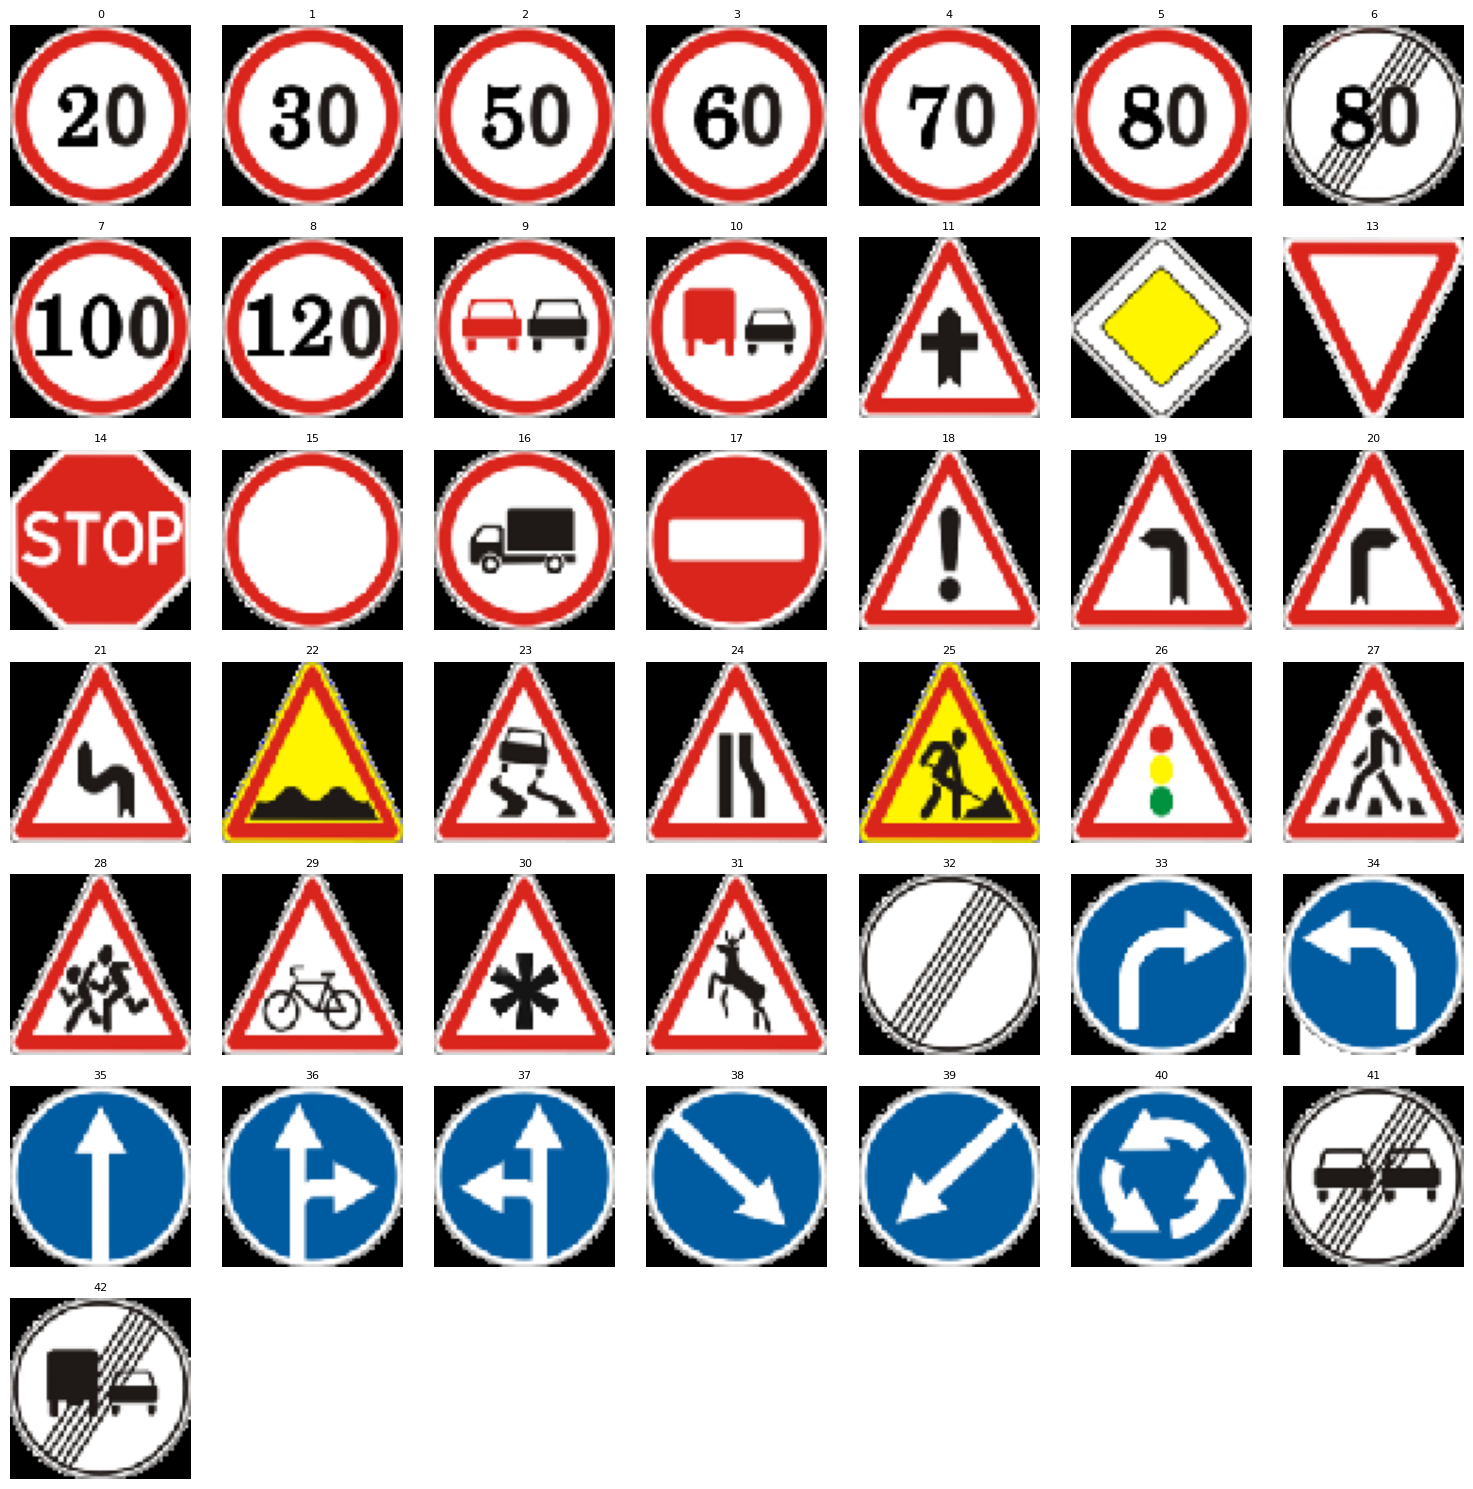

In [6]:
plot_classes(meta_path)

Now we set all the images to the same size and adjust the pixels, so they're ready for training the model

In [7]:
num_classes = train_df['ClassId'].nunique()

In [8]:
x_train, y_train = process_split_data(train_df, num_classes, train_path)

In [9]:
x_test, y_test = process_split_data(test_df, num_classes, test_path)

Now the data is ready to be used

## Building Model

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [11]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=15,
    batch_size=64
)

Epoch 1/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4406 - loss: 1.9624 - val_accuracy: 0.7796 - val_loss: 0.7402
Epoch 2/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8513 - loss: 0.4734 - val_accuracy: 0.9097 - val_loss: 0.3447
Epoch 3/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9291 - loss: 0.2318 - val_accuracy: 0.9350 - val_loss: 0.2644
Epoch 4/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9536 - loss: 0.1531 - val_accuracy: 0.9429 - val_loss: 0.2345
Epoch 5/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9655 - loss: 0.1112 - val_accuracy: 0.9397 - val_loss: 0.2542
Epoch 6/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9746 - loss: 0.0827 - val_accuracy: 0.9477 - val_loss: 0.2277
Epoch 7/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9783 - loss: 0.0691 - val_accuracy: 0.9587 - val_loss: 0.1975
Epoch 8/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9808 - loss: 0.0609 - val_accu

Visualizing the accuracy

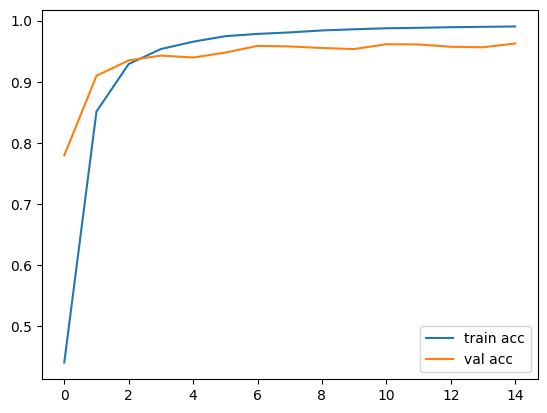

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Checking the prediction accuracy

In [16]:
y_pred = model.predict(x_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

In [21]:
acc = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9627


In [22]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

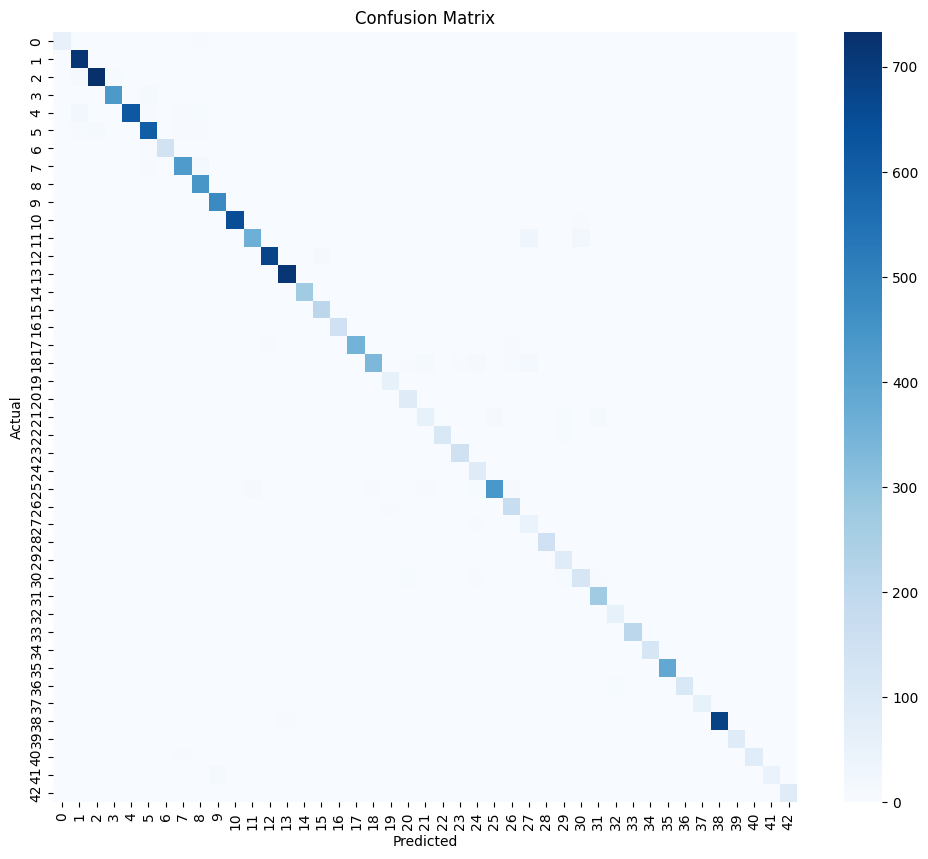

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.95      0.99      0.97       720
           2       0.98      0.98      0.98       750
           3       0.98      0.96      0.97       450
           4       1.00      0.94      0.97       660
           5       0.95      0.96      0.96       630
           6       1.00      0.95      0.98       150
           7       0.96      0.95      0.96       450
           8       0.93      0.99      0.96       450
           9       0.97      1.00      0.98       480
          10       1.00      0.99      0.99       660
          11       0.97      0.86      0.91       420
          12       0.99      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.92      1.00      0.96       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [26]:
model.save("traffic_sign_model.keras")